# Lab 8

## Problem 1

Feeding in the entire training dataset into the network is called an training epoch. As every image only
slightly changes the neural network weights, networks are typically trained for more than one epoch.

a) Create a 'network' module and design a network testNet with 784 input nodes, 100 hidden nodes, 10 output
nodes and a learning rate of 0.6.

In [30]:
from network import neuralNetwork as nn

In [31]:
iNodes = 784
hNodes = 100
oNodes = 10
lRate = 0.6

my_network = nn(iNodes, hNodes, oNodes, lRate)

b) Download the mnist.zip file, extract its contents and use np.load to load the *.npy files of the
training and test images and labels.


In [32]:
import numpy as np

path = '/mnt/share/nnds/mnist/'

trainData = np.load(path+'mnistDataTrain.npy')
trainLabels = np.load(path+'mnistLabelsTrain.npy')

testData = np.load(path+'mnistDataTest.npy')
testLabels = np.load(path+'mnistLabelsTest.npy')

c) Write a method `batchTrain(self, dataTrain, labelsTrain)` that takes a training data array and
a labels array as arguments and trains the network with every image of the training data array.


In the module `network.py`:

```python
def batchTrain(self, dataTrain, labelsTrain):
        for i, label in enumerate(labelsTrain):
            # create target vector
            target = np.zeros(10, dtype='float') + 0.01 # Set the target vector
            target[label] = 0.99

            # feed image with target vector into method `train`
            self.train(dataTrain[i], target)
```

d) Train your network for at least 10 epochs, but feel free to go even further. After every epoch, evaluate
the fraction of test images that the networks classifies correctly and store it in a list or array score. Use
time.time() from the time library to measure the total execution time of your multi-epoch training
and test. Open the Task Manager and inspect the utilization of your system (CPU, RAM).


In [33]:
import time

In [34]:
start_time = time.time()

number_of_epocs = 50
score = []
for n in range(number_of_epocs):
    my_network.batchTrain(trainData,trainLabels)
    performance = my_network.evaluate(testData, testLabels)
    # print("Performance after epoc no. "+ str(n+1) + ": " + str(performance))
    score.append(performance)

end_time = time.time()
total_time = end_time - start_time
print("Total execution time: {:.2f} seconds".format(total_time))

Total execution time: 359.97 seconds


e) Generate a plot to illustrate the evolution of the network’s performance as a function of the number
of training epochs. Discuss your result.


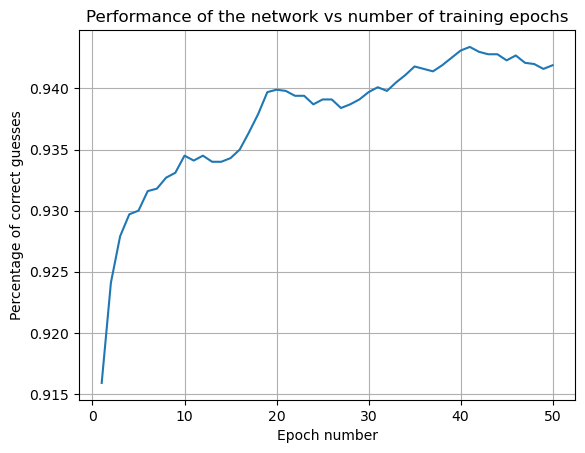

In [36]:
import matplotlib.pyplot as plt


plt.plot(range(1,number_of_epocs+1),score)
plt.title('Performance of the network vs number of training epochs')
plt.xlabel('Epoch number')
plt.ylabel('Percentage of correct guesses')
plt.grid(True)

In [44]:
print("Best performance achieved: " + str(np.max(score)))
print("Achieved best performance in epoch no. " + str(np.argmax(score)+1))
print("Second best performance achieved: " + str(np.max(score[:np.argmax(score)])))
print("Achieved second best performance in epoch no. " + str(np.argmax(score[:np.argmax(score)])))
print("Lowest performance" + str(np.min(score)))


Best performance achieved: 0.9434
Achieved best performance in epoch no. 41
Second best performance achieved: 0.9431
Achieved second best performance in epoch no. 39
Lowest performance0.9159


An upward trend can be seen, so it is evident that the networks ability to identify a handwritten digit improves as it is trained with more epochs. However, it is also interesting to note that the improvement of the network is not absolute from epoch to epoch. In fact, after reaching a first peak at around epoch 10, the network gets worse for approximately the next 5 epochs, after which it does see an almost linear improvement until epoch 20. Then, it has again another dip in its performance, and it starts to recover some ten epochs later. 

These alternations between peaks and worsened performance might mean that the optimization of the network might have found some local minima, and then progressed over the loss function enough that it left the points where the gradient was zero in the loss function and towards points with a gradient. 

Overall, the network performed the best at epoch number 41, with a performance of 94,34%.

## Problem 2

The number of hidden nodes has a big impact on the performance of the network. However, too many nodes
just increase the computational effort and slow down the convergence of the training process. What’s the
sweet spot?

a) Create a list of integers `nodes` that contains values between 40 and 480 with a step size of 20. Use that
list and list comprehension to create a list of neural networks networks where the number of hidden
nodes are given by the list `nodes`. Keep the other parameters constant.

In [46]:
nodes = list(range(40,480,20))
print(nodes)

[40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460]


b) Use the `batchTrain` method to train all networks. For every network, evaluate the fraction of test
images that it classifies correctly and store the result in a list or array score.

c) Generate a plot to illustrate the classification performance as a function of the number of hidden nodes.
Discuss your result.

## Problem 3

The learning rate controls the speed of the gradient descent which in turn affects the speed and quality of
the network’s convergence during the training process.

a) Create a list or array `lRates` with 30 floats between 0.1 and 0.9. Use list comprehension and these
learning rates to create a list of neural networks `networks`.

b) Use the `batchTrain` method to train all networks. For every network, evaluate the fraction of test
images that it classifies correctly and store the result in a list or array score.

c) Generate a plot to illustrate the classification performance as a function of the learning rate. Discuss
your result.

## Problem 4

In the first three problems, you have explored the parameter space for the three free parameters of our
custom neural network. Time for an actual application!

a) Create a neural network `readNet`. Use the set of parameters that yields the best performance.

b) Train the network and use the `saveWeights`` method to save the weights. What’s the performance of
your network?

c) Read in the handwritten digit(s) you have created for problem sheet 6 as a numpy array. Normalize
the array entries such that they fit the network’s requirements. Query your network, apply the softmax
function to the output vector and discuss the result.